In [1]:
#Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('Reviews.csv', nrows=1000)
df.head(3)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1000 non-null   int64 
 1   ProductId               1000 non-null   object
 2   UserId                  1000 non-null   object
 3   ProfileName             1000 non-null   object
 4   HelpfulnessNumerator    1000 non-null   int64 
 5   HelpfulnessDenominator  1000 non-null   int64 
 6   Score                   1000 non-null   int64 
 7   Time                    1000 non-null   int64 
 8   Summary                 1000 non-null   object
 9   Text                    1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


In [3]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [4]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

In [5]:
!pip install textblob

In [6]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob, Word
nltk.download('stopwords')
nltk.download('wordnet')
df = pd.DataFrame({'Text': ["This is an example sentence!", "Another sample text with errorss."]})
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]', ' ', regex=True)
stop = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df['Text'] = df['Text'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))
print(df['Text'].head())
reviews = df

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0             example sentence
1    another sample text error
Name: Text, dtype: object


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


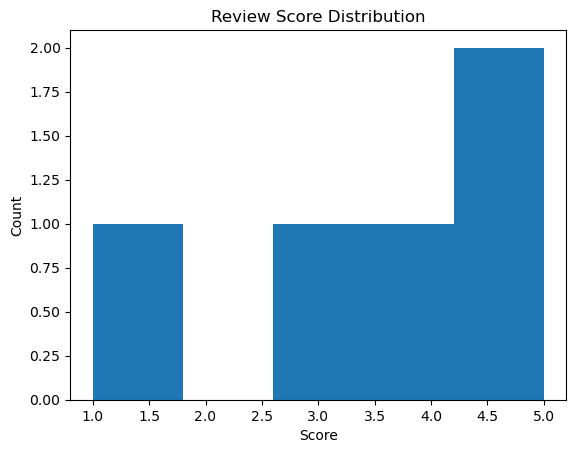

Score
1    1
3    1
4    1
5    2
Name: Id, dtype: int64


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob, Word
nltk.download('stopwords')
nltk.download('wordnet')
df = pd.DataFrame({
    'Id': [1, 2, 3, 4, 5],
    'Text': ["This is an example sentence!", "Another sample text with errorss.", 
             "I love this product!", "Worst experience ever.", "Fantastic item!"],
    'Score': [5, 3, 5, 1, 4] 
})
df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Text'] = df['Text'].str.replace('[^\w\s]', ' ', regex=True)
stop = set(stopwords.words('english'))
df['Text'] = df['Text'].apply(lambda x: " ".join(word for word in x.split() if word not in stop))
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).correct()))
df['Text'] = df['Text'].apply(lambda x: " ".join(Word(word).lemmatize() for word in x.split()))
reviews = df.copy()
reviews.dropna(inplace=True)
if 'Score' in reviews.columns:
    reviews['Score'].hist(bins=5, grid=False)
    plt.xlabel('Score')
    plt.ylabel('Count')
    plt.title('Review Score Distribution')
    plt.show()
    if 'Id' in reviews.columns:
        print(reviews.groupby('Score')['Id'].count()) 
    else:
        print("Column 'Id' not found in dataset.")
else:
    print("Column 'Score' not found in dataset.")


In [8]:
import pandas as pd
score_counts = reviews['Score'].value_counts()
score_1 = reviews[reviews['Score'] == 1].sample(n=min(score_counts.get(1, 0), 47), replace=False)
score_2 = reviews[reviews['Score'] == 2].sample(n=min(score_counts.get(2, 0), 47), replace=False)
score_3 = reviews[reviews['Score'] == 3].sample(n=min(score_counts.get(3, 0), 47), replace=False)
score_4 = reviews[reviews['Score'] == 4].sample(n=min(score_counts.get(4, 0), 47), replace=False)
score_5 = reviews[reviews['Score'] == 5].sample(n=min(score_counts.get(5, 0), 47), replace=False)
balanced_reviews = pd.concat([score_1, score_2, score_3, score_4, score_5])
print(balanced_reviews.head())

   Id                       Text  Score
3   4      worst experience ever      1
1   2  another sample text error      3
4   5             fantastic item      4
0   1           example sentence      5
2   3               love product      5


In [9]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

In [10]:
print(reviews_sample.groupby('Score').count().Id)

Score
1    1
3    1
4    1
5    2
Name: Id, dtype: int64


Available columns: Index(['Id', 'Text', 'Score'], dtype='object')


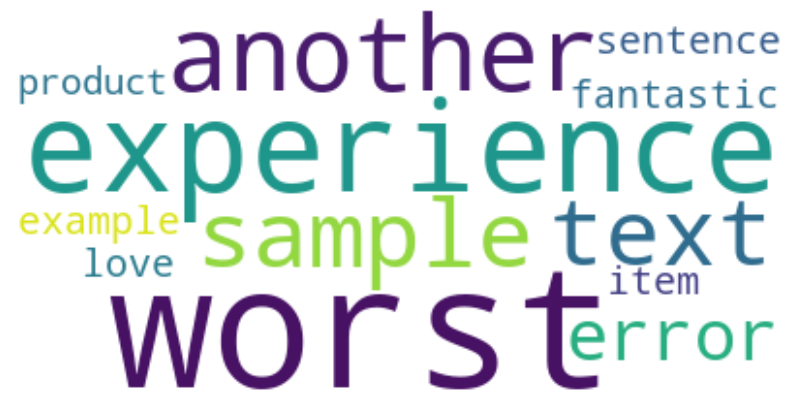

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
print("Available columns:", reviews_sample.columns)
if 'Summary' in reviews_sample.columns:
    reviews_str = " ".join(reviews_sample["Summary"].dropna().astype(str).to_numpy())
elif 'Text' in reviews_sample.columns:
    reviews_str = " ".join(reviews_sample["Text"].dropna().astype(str).to_numpy())
else:
    raise KeyError("Neither 'Summary' nor 'Text' columns found in dataset.")
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [20]:
negative_reviews_str = " ".join(reviews_sample[reviews_sample['Score'].isin([1,2])]['Review'].dropna())  
positive_reviews_str = " ".join(reviews_sample[reviews_sample['Score'].isin([4,5])]['Review'].dropna())  
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)  
wordcloud_positive = WordCloud(background_color='white').generate(positive_reviews_str)  


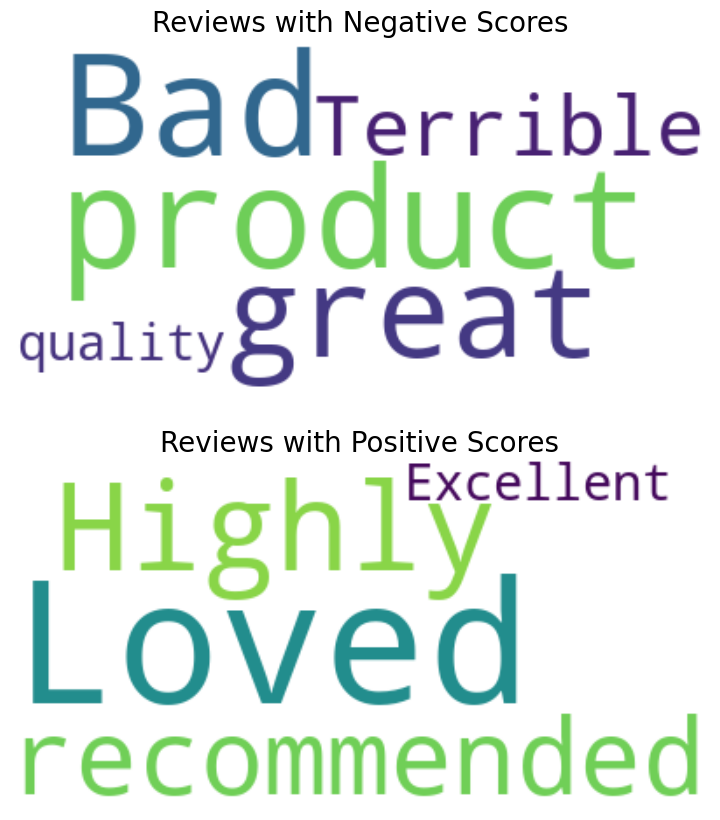

In [21]:
wordcloud_negative = WordCloud(background_color='white') \
   .generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='white') \
.generate(positive_reviews_str)
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative,interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Scores',fontsize=20)
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive,interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores',fontsize=20)
plt.show()

In [22]:
!pip install vaderSentiment

  Obtaining dependency information for vaderSentiment from https://files.pythonhosted.org/packages/76/fc/310e16254683c1ed35eeb97386986d6c00bc29df17ce280aed64d55537e9/vaderSentiment-3.3.2-py2.py3-none-any.whl.metadata
   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   ---------------------------------------  122.9/126.0 kB 7.0 MB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.1 MB/s eta 0:00:00


In [23]:
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
plt.style.use('fivethirtyeight')
cp = sns.color_palette()
analyzer = SentimentIntensityAnalyzer()
emptyline=[]
for row in df['Text']:
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)

In [24]:
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.435,0.565,0.0772
1,0.474,0.526,0.000,-0.4019
2,0.000,0.192,0.808,0.6369
3,0.672,0.328,0.000,-0.6249
4,0.000,0.217,0.783,0.5574
